# **Import** **Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# **Load** **Data**

In [2]:
data = pd.read_excel('Concrete_Data.xls')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# **Data** **Preprocessing**

## **Study** **Features**

In [3]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1,-0.275193,-0.397475,-0.0815436,0.0927714,-0.109356,-0.22272,0.0819473,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1,-0.323569,0.107286,0.0433757,-0.283998,-0.281593,-0.0442458,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1,-0.257044,0.37734,-0.00997679,0.0790764,-0.15437,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.0815436,0.107286,-0.257044,1,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.0927714,0.0433757,0.37734,-0.657464,1,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.00997679,-0.182312,-0.266303,1,-0.178506,-0.00301551,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.22272,-0.281593,0.0790764,-0.450635,0.222501,-0.178506,1,-0.156094,-0.167249
Age (day),0.0819473,-0.0442458,-0.15437,0.277604,-0.192717,-0.00301551,-0.156094,1,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1


## **Drop** **Features** 

In [4]:
dataset = data.drop('Fly Ash (component 3)(kg in a m^3 mixture)', axis=1)

## **Split** **data** **into** **features** **and** **labels**

In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print('shape of X: ',X.shape)

shape of X:  (1030, 7)


## **split** **features** **into** **train** **and** **test**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Standardization**

In [7]:

Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

# **Polynomial** **Regression**

In [28]:
###### Simple Linear Regression ######## 
def lin_reg_model():
    lin_reg = LinearRegression()       # Instantiate Simple Regression model
    lin_reg.fit(X_train, y_train)      # Train the model
    y_pred = lin_reg.predict(X_test)   # Test the model
    lin_R2 = r2_score(y_test, y_pred)  # R squared to evaluate the model
    return (lin_R2, y_pred)

######## Finding best degree for Polynomial Regression ###########
def find_best_degree():
    max_R = 0                                                  # Maximum R squared of polynomial Regression model
    best_degree = 0                                            # Best degree for Polynomial Regression model
    for degree in range(1,13):
        poly_1 = PolynomialFeatures(degree=degree)             # Instantiate polynomial Features 
        poly_X_train = poly_1.fit_transform(X_train)           # Train Polynomial Features
        lin_reg = LinearRegression()                           # Instantiate Simple Regression model
        lin_reg.fit(poly_X_train, y_train)                     # Apply Simple Regression on Polynomial Features
        poly_X_test = poly_1.transform(X_test)                 # Test the model
        R2 = r2_score(y_test, lin_reg.predict(poly_X_test))    # R squared of Linear Regression model
        if R2 > max_R:
            max_R = R2
            best_degree = degree
    return (best_degree, max_R)


########### Finding best alphha for ridge model #############
def find_best_alpha_ridge(best_degree):
    max_R2 = 0                                                                 # Maximum R squared of Ridge model
    for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
        poly_2 = PolynomialFeatures(degree=best_degree)                        # Instantiate polynomial Features
        ridge_1 = Ridge(alpha=alpha, normalize=True)                           # Instantiate Ridge model
        ridge_1.fit(poly_2.fit_transform(X_train), y_train)             # Apply Ridge model on Polynomial Features
        R2_ridge = r2_score(y_test, ridge_1.predict(poly_2.transform(X_test))) # R squared of Ridge model
        if R2_ridge >max_R2:
            max_R2 = R2_ridge
            best_alpha = alpha
    return (best_alpha, max_R2)


########### finding best alpha for Lasso model #########
def find_best_alpha_lasso(best_degree):
    max_r2=0                                                                    # Maximum R squared of Lasso model
    for alpha in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]:
        poly_3 = PolynomialFeatures(best_degree)                                # Instantiate polynomial Features
        lasso_2 = Lasso(alpha=alpha, normalize=True)                            # Instantiate Lasso model
        lasso_2.fit(poly_3.fit_transform(X_train), y_train)             # Apply Lasso model on Polynomial Features
        lasso_R2 = r2_score(y_test, lasso_2.predict(poly_3.transform(X_test)))  # R squared of Lasso model
        if lasso_R2 > max_r2:
            max_r2 = lasso_R2
            best_alpha = alpha
        
    count = 0                               # Number of selected Features by Lasso model
    for i in lasso_2.coef_:
        if i != 0:
            count+=1
    #pd.DataFrame(lasso_2.coef_) 
    return (best_alpha, max_r2, count)     


########### Finding best regressor with highest R squared ############
def find_best_regressor(X_train, y_train, X_test, y_test):
    ########### LINEAR REGRESSION #############
    lin_R2, y_pred = lin_reg_model()
    best_degree=1
    best_alpha=0
    ########### POLYNOMIAL REGRESSION #############
    best_degree, poly_R2 = find_best_degree()
    
    ### RIDGE ###
    best_alpha, max_R2_ridge = find_best_alpha_ridge(best_degree)
    
    ### LASSO ###
    best_alpha, max_R2_lasso, count = find_best_alpha_lasso(best_degree)
    
    R2 =[lin_R2, max_R2_ridge, max_R2_lasso]
    best_R2 = max(R2)
    if best_R2 == lin_R2:
        best_regressor = 'Linear Regression'
        return(best_regressor, best_degree, best_R2)
    elif best_R2 == max_R2_ridge:
        best_regressor = 'Ridge'
        return(best_regressor, best_degree, best_R2)
    else:
        best_regressor = 'Lasso'
        return(best_regressor, best_degree, best_alpha, best_R2)

## **finding** **best** **parameters**

In [29]:
best_regressor, best_degree, best_alpha, best_R2 =  find_best_regressor(X_train, y_train, X_test, y_test)
print('Best Regressor:', best_regressor, 'Best Degree:',
      best_degree, 'Best Alpha:', best_alpha, 'best score:', best_R2)

/home/nada/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.984664e-17
  overwrite_a=True).T
/home/nada/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10364.61605496124, tolerance: 23.258623112598066
  positive)
/home/nada/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10364.613302611411, tolerance: 23.258623112598066
  positive)
/home/nada/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

Best Regressor: Lasso Best Degree: 3 Best Alpha: 0.001 best score: 0.8561388866597052


/home/nada/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7552.663262553206, tolerance: 23.258623112598066
  positive)
/home/nada/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.155222309666, tolerance: 23.258623112598066
  positive)


## **Build**, **train** **and** **test** **model**

R2 for Lasso 0.8561388866597052


/home/nada/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.155222309666, tolerance: 23.258623112598066
  positive)


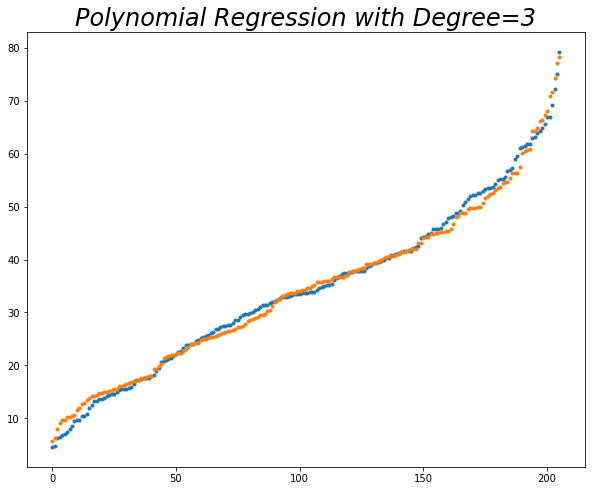

In [18]:
poly = PolynomialFeatures(degree=best_degree)                      # Instantiate polynomial Features
lasso = Lasso(alpha=best_alpha, normalize=True)                    # Instantiate Lasso model
lasso.fit(poly.fit_transform(X_train), y_train)                    # Apply Lasso model on Polynomial Features
R2_lasso = r2_score(y_test, lasso.predict(poly.transform(X_test)))  # R squared of Lasso model
print('R2 for Lasso', R2_lasso)
plt.figure(figsize=(10,8))
plt.title('Polynomial Regression with Degree=%s' %best_degree, fontsize=24 , fontstyle='italic')
# Plotting y_predicted vs y_actual
plt.plot((np.sort(y_test.ravel())), '.', np.sort(lasso.predict(poly.transform(X_test))), '.')

# **Finding** **best** **parameters** **for** **Decision** **Tree** **using** **Grid** **Search**

In [30]:
DT = DecisionTreeRegressor(random_state=0)                                       # Instantiate Decision Tree model
parameters = [{'max_depth': np.arange(30), 'min_samples_leaf': [1,2,3,4,5]}]     # Set parameters of the model


grid_search = GridSearchCV(estimator = DT, param_grid = parameters,        
                           cv = 7, n_jobs =  -1)                                 # Instantiate Grid Search model
 
grid_search = grid_search.fit(X_train, y_train)                                  # Train Grid Search model
 
print("best accuracy is :" , grid_search.best_score_)                            # Display best accuracy

grid_search.best_params_ # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 0.8406930115323016


{'max_depth': 19, 'min_samples_leaf': 1}

## **Build**, **train** **and** **test** **the** **model**

train_score 0.9806782707523526
test_score 0.8405891179889362


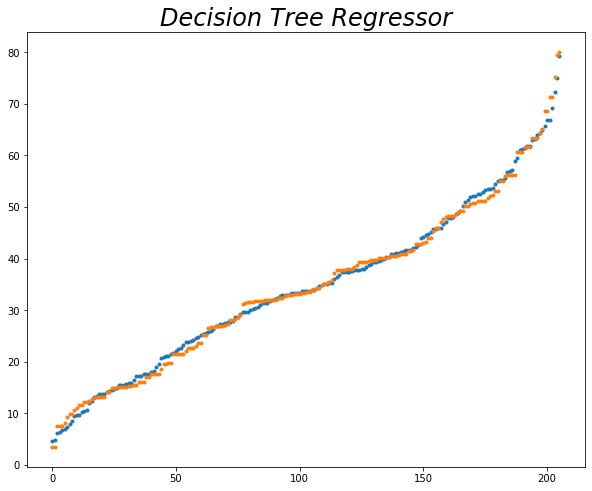

In [31]:
DT = DecisionTreeRegressor(max_depth=19, min_samples_leaf=2, random_state=0)    # Instantiate Decision Tree model
DT.fit(X_train, y_train)                                                        # Train Random Forest model
print('train_score', DT.score(X_train, y_train))                                # Display train accuracy
print('test_score', DT.score(X_test, y_test))                                   # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('Decision Tree Regressor', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test.ravel()), '.', np.sort(DT.predict(X_test)), '.')        # Plotting y_predicted vs y_actual

# **Finding** **best** **parameters** **for** **Random** **Forest** **using** **Grid** **Search**

In [157]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [78,  80, 83],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [500, 600, 700]}                                 # Set parameters of the model
RF = RandomForestRegressor(random_state=2)                           # Instantiate Random Forest model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 7, n_jobs = -1, verbose = 2)          # Instantiate Grid Search model
grid_search = grid_search.fit(X_train, y_train)                      # Train Grid Search model

print("best accuracy is :" , grid_search.best_score_)                # Display best accuracy

grid_search.best_params_    # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

Fitting 7 folds for each of 243 candidates, totalling 1701 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1701 out of 1701 | elapsed: 13.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best accuracy is : 0.8994427647700831


{'bootstrap': True,
 'max_depth': 78,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

## **Build**, **train** **and** **test** **the** **model**

train_score 0.9854080042371535
test_score 0.9230426049917837


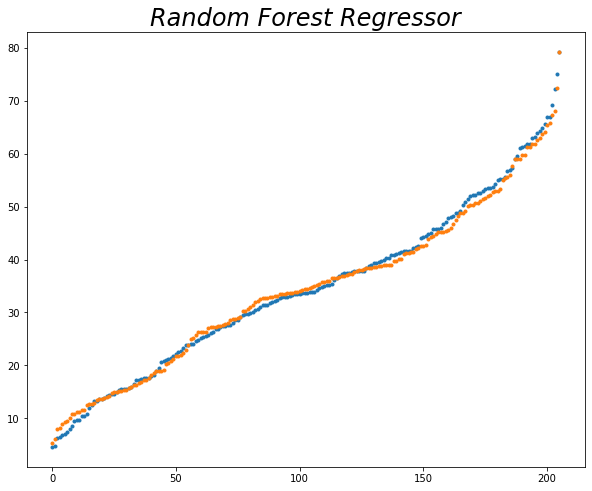

In [32]:
RF_reg = RandomForestRegressor(n_estimators=500, max_depth=80,
                               min_samples_leaf=1, min_samples_split=2,
                               max_features=6, bootstrap=True, random_state=2)  # Instantiate Random forest model
RF_reg.fit(X_train, y_train)                                                    # Train Random Forest model
print('train_score', RF_reg.score(X_train, y_train))                            # Display train accuracy
print('test_score', RF_reg.score(X_test, y_test))                               # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('Random Forest Regressor', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test.ravel()),'.', np.sort(RF_reg.predict(X_test)), '.')  # Plotting y_predicted vs y_actual

# **Finding best parameters for XGBoost by Grid Search**

In [0]:
XG = XGBRegressor()                                                  # Instantiate XG Boost Regressor model
param = {"n_estimators"     : [800,900],
         "learning_rate"    : [0.1],
         "max_depth"        : [5,6],
         "min_child_weight" : [3,4],
         "gamma"            : [0.5,0.6],
         "colsample_bytree" : [0.7,0.8,0.9],
         "subsample"        : [0.7,0.8,0.9],
         "alpha"            : [0.0],
         "lambda"           : [0.0]}                                 # Set parameters of the model          
grid_search = GridSearchCV(estimator = XG, param_grid = param, 
                          cv = 7, n_jobs = -1, verbose = 2)          # Instantiate Grid Search model
grid_search = grid_search.fit(X_train, y_train)                      # Train Gird Search model

print("best accuracy is :" , grid_search.best_score_)                # Display best accuracy

grid_search.best_params_    # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

Fitting 7 folds for each of 144 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1008 out of 1008 | elapsed:  4.4min finished


[12:15:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best accuracy is : 0.9391152720304851


{'alpha': 0.0,
 'colsample_bytree': 0.8,
 'gamma': 0.6,
 'lambda': 0.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 900,
 'subsample': 0.8}

## **Build, train and test the model**

train_score 0.9959481527232547
test_score 0.9464979677649545


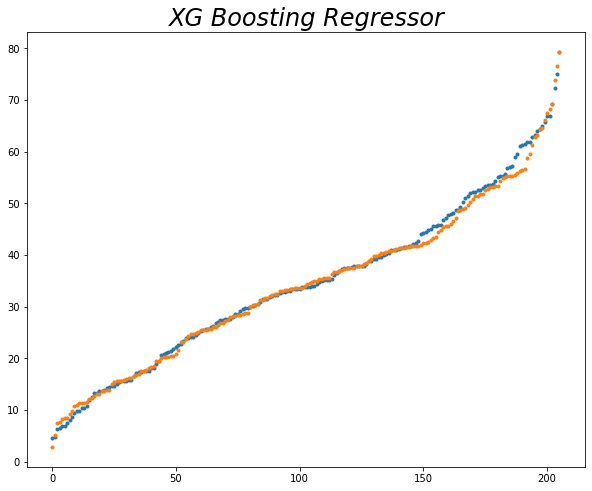

In [35]:
XGB = XGBRegressor(n_estimators=600, gamma=0.6, learning_rate=0.08,
                   max_depth=7, min_child_weight=2, subsample=0.8,
                   colsample_bytree=0.8, reg_alpha=0.0,
                   reg_lambda=0, random_state=0)                             # Instantiate XG Boost Regressor model
XGB.fit(X_train, y_train)                                                    # Train XG Boost Regressor model
print('train_score', XGB.score(X_train, y_train))                            # Display train accuracy
print('test_score', XGB.score(X_test, y_test))                               # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('XG Boosting Regressor', fontsize=24 , fontstyle='italic')          
plt.plot(np.sort(y_test.ravel()), '.', np.sort(XGB.predict(X_test)), '.')     # Plotting y_predicted vs y_actual

# **Finding best parameters for Gradient Boosting Regressor by Grid Search**

In [0]:
GB = GradientBoostingRegressor()                                    # Instantiate Gradient Boosting Regressor model
param = {"n_estimators"     : [300, 400, 500],
         "max_depth"        : [4, 5, 6],
         "min_samples_leaf" : [1, 2, 3, 4],
         "learning_rate"    : [0.1, 0.2 , 0.3, 0.4],
         "max_features"     : [4 , 5, 6]}                           # Set parameters of the model
grid_search = GridSearchCV(estimator = GB, param_grid = param, 
                          cv = 7, n_jobs = -1, verbose = 2)         # Instantiate Grid Search model
grid_search = grid_search.fit(X_train, y_train)                     # Train Gird Search model

print("best accuracy is :" , grid_search.best_score_)               # Display best accuracy             

grid_search.best_params_     # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

Fitting 7 folds for each of 432 candidates, totalling 3024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3024 out of 3024 | elapsed:  8.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best accuracy is : 0.9365269644298653


{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 1,
 'n_estimators': 500}

## **Build, train and test the model**

train_score 0.9922885198360166
test_score 0.9481623076483092


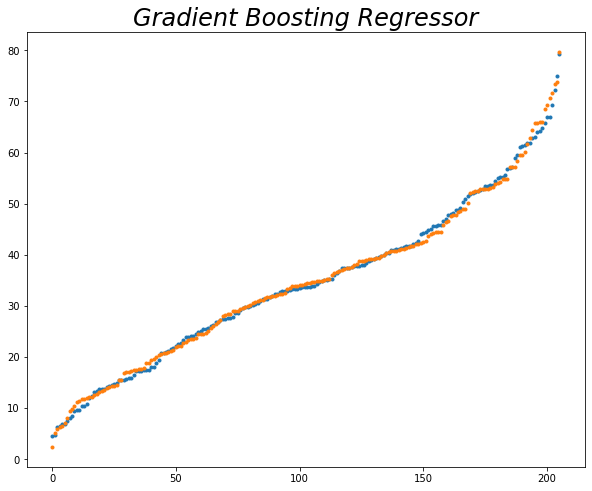

In [36]:
GB_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.08,
                                   min_samples_leaf=2, max_depth=4,
                                   max_features=1, random_state=0)  # Instantiate Gradient Boosting Regressor model
GB_reg.fit(X_train, y_train)                                        # Train Gradient Boost Regressor model
print('train_score', GB_reg.score(X_train, y_train))                # Display train accuracy
print('test_score', GB_reg.score(X_test, y_test))                   # Display test accuracy   
plt.figure(figsize=(10,8))
plt.title('Gradient Boosting Regressor', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test.ravel()), '.', np.sort(GB_reg.predict(X_test)), '.')    # Plotting y_predicted vs y_actual
  